# DBSCAN Clustering

## Que: Perform Clustering (Kmeans) for the crime data and identify the number of clusters formed and draw inferences

## Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN


## Importing the Data

In [6]:
crime = pd.read_csv('/content/crime_data.csv')
crime.head(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7


## Data Understanding

In [7]:
crime.shape

(50, 5)

In [8]:
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
crime.duplicated().sum()

0

In [10]:
crime_d1 = crime.iloc[:,1:5]
crime_d1.head(6)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


## Data Preparation

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
st_scaler = StandardScaler()
crime_std = st_scaler.fit_transform(crime_d1)
crime_std = pd.DataFrame(data= crime_std, columns=['Murder','Assault','UrbanPop','Rape'])
crime_std.head(6)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901


## Model Builing and Model Training

In [13]:
DBSCAN_model= DBSCAN(eps=0.8, min_samples=6)
DBSCAN_model.fit(crime_std)

DBSCAN(eps=0.8, min_samples=6)

In [14]:
y_km = DBSCAN_model.fit_predict(crime_std)
y_km

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0])

In [15]:
clusters = pd.DataFrame(y_km,columns=['clusters'])
clusters.head()

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1


In [16]:
crime['clusters']= clusters
crime.head(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1


In [17]:
crime['clusters'].value_counts()

-1    42
 0     8
Name: clusters, dtype: int64

In [18]:
crime[crime['clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
26,Nebraska,4.3,102,62,16.5,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
37,Pennsylvania,6.3,106,72,14.9,0
45,Virginia,8.5,156,63,20.7,0
49,Wyoming,6.8,161,60,15.6,0


In [19]:
crime[crime['clusters']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [20]:
crime.groupby(by='clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,8.009524,178.904762,65.380952,21.7500
1,0,6.625000,128.000000,66.375000,18.5125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


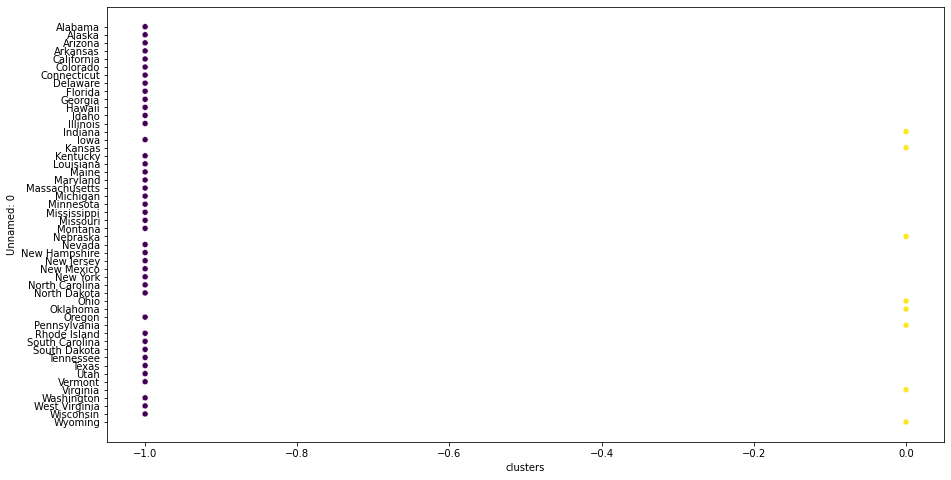

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(crime['clusters'],crime['Unnamed: 0'],c=DBSCAN_model.labels_) 
plt.show()